In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hotel_booking.csv')

# Display the first 5 rows of the DataFrame
#print(df.head())

In [4]:
from IPython.display import display
display(df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [5]:
# Number of zeros in a column
# required_car_parking_spaces: 93.79%   babies: 99.23%    children: 92.8%    previous_cancellations: 94.57%
search = 'adults'
zeros = 0
total = df[search].size
for i in range(total):
  if df[search][i] == 0:
    zeros += 1
print(f'{zeros} / {total}')
print('%.2f' % (zeros / total * 100), '%')

403 / 119390
0.34 %


In [6]:
search = 'country'
occ = 0
total = df[search].size
for i in range(total):
  if df[search][i] == 'USA':
    occ += 1
print(f'{occ} / {total}')

2097 / 119390


In [7]:
# different words
search = 'country'
zeros = 0
total = df[search].size
word_list = []
for i in range(total):
  if not (df[search][i] in word_list):
    word_list.append(df[search][i])

print(word_list)

['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP', 'KNA', 'ETH', 'IRQ', 'HND', 'RWA', 'KHM', 'MCO', 'BGD', 'IMN', 'TJK', 'NIC', 'BEN', 'VGB', 'TZA', 'GAB', 'GHA', '

In [8]:
hotels = ['Resort Hotel', 'City Hotel']
country = []   #177 countries
market_segment = ['Direct', 'Corporate', 'Online TA', 'Offline TA/TO', 'Complementary', 'Groups', 'Undefined', 'Aviation']
distribution_channel = ['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS']
deposit_type = ['No Deposit', 'Refundable', 'Non Refund']
customer_type = ['Transient', 'Contract', 'Transient-Party', 'Group']


remove_list = ['credit_card', 'phone-number', 'email',
               'name', 'arrival_date_year',
               'reservation_status' #repetitive
               , 'company', 'agent', 'babies', 'children', 'required_car_parking_spaces',
               'meal' #majority of meals by far is BB (Bed and Breakfast)
               , 'reservation_status_date', 'arrival_date_week_number', 'previous_cancellations']
for lst in remove_list:
  df.pop(lst)

#display(df)
# 13 features were removed

In [9]:
def mtn(x):
    return x.map({'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7,
         'August': 8,
         'September': 9,
         'October': 10,
         'November': 11,
         'December': 12
    })

def letter(x):
    return x.map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I':9, 'K': 10,'L': 11, 'P': 12})

def deposit(x):
    return x.map({'No Deposit':1, 'Refundable':2, 'Non Refund':3})

def customer(x):
    return x.map({'Transient':1, 'Contract':2, 'Transient-Party':3, 'Group':4})

def channel(x):
    return x.map({'Undefined': 0, 'Direct':1, 'Corporate':2, 'TA/TO':3, 'GDS':4})

def segment(x):
    return x.map({'Undefined': 0, 'Direct':1, 'Corporate':2, 'Online TA':3, 'Offline TA/TO':4, 'Complementary':5, 'Groups':6, 'Aviation':7})

var = ['arrival_date_month']
df[var] = df[var].apply(mtn)
var = ['reserved_room_type', 'assigned_room_type']
df[var] = df[var].apply(letter)
var = ['deposit_type']
df[var] = df[var].apply(deposit)
var = ['customer_type']
df[var] = df[var].apply(customer)
var = ['distribution_channel']
df[var] = df[var].apply(channel)
var = ['market_segment']
df[var] = df[var].apply(segment)

#display(df.deposit_type)

In [10]:
#df = df.loc[df['country'] == 'USA']
df.pop('country')

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

In [11]:
part1 = df.loc[df['hotel'] == 'Resort Hotel']
part1.pop('hotel')
part1 = part1.reset_index(drop=True)
part2 = df.loc[df['hotel'] == 'City Hotel']
part2.pop('hotel')
part2 = part2.reset_index(drop=True)
print('Resort Hotel')
display(part1.head())
print('\nCity Hotel')
display(part2.head())

Resort Hotel


,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,market_segment,distribution_channel,is_repeated_guest,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,total_of_special_requests
0,0,342,7,1,0,0,2,1,1,0,0,3,3,3,1,0,1,0.0,0
1,0,737,7,1,0,0,2,1,1,0,0,3,3,4,1,0,1,0.0,0
2,0,7,7,1,0,1,1,1,1,0,0,1,3,0,1,0,1,75.0,0
3,0,13,7,1,0,1,1,2,2,0,0,1,1,0,1,0,1,75.0,0
4,0,14,7,1,0,2,2,3,3,0,0,1,1,0,1,0,1,98.0,1



City Hotel


,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,market_segment,distribution_channel,is_repeated_guest,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,total_of_special_requests
0,0,6,7,1,0,2,1,4,3,0,0,1,1,0,1,0,1,0.0,0
1,1,88,7,1,0,4,2,3,3,0,0,1,1,0,1,0,1,76.5,1
2,1,65,7,1,0,4,1,3,3,0,0,1,1,0,1,0,1,68.0,1
3,1,92,7,1,2,4,2,3,3,0,0,1,1,0,1,0,1,76.5,2
4,1,100,7,2,0,2,2,3,3,0,0,1,1,0,1,0,1,76.5,1


In [12]:
#print('Part 1 number of canceled reservation:', part1.loc[df['is_canceled'] == 1].size / 20, '/', part1.size / 20)
#print('Part 2 number of canceled reservation:', part2.loc[df['is_canceled'] == 1].size / 20, '/', part2.size / 20)

In [13]:
part1.iloc[:,0]

0        0
1        0
2        0
3        0
4        0
        ..
40055    0
40056    0
40057    0
40058    0
40059    0
Name: is_canceled, Length: 40060, dtype: int64

In [14]:
X1 = part1.iloc[:, 1:].values
Y1 = part1.iloc[:, 0].values

X2 = part2.iloc[:, 1:].values
Y2 = part2.iloc[:, 0].values

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.20, random_state=42)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.20, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler

# Scale for both resort and city hotels
sc_X = StandardScaler()
X1_train = sc_X.fit_transform(X1_train)
X1_test = sc_X.transform(X1_test)

X2_train = sc_X.fit_transform(X2_train)
X2_test = sc_X.transform(X2_test)

In [16]:
#Change with resort and city if needed
#Logistic Regression Model
def logistic_regression(X_train, Y_train, X_test, Y_test, cv=None, penalty='l2', c=0.001, max_iter=10000,solver = 'lbfgs'):
  classifier = LogisticRegression(penalty=penalty, C=c, solver=solver, random_state=0)
  classifier.fit(X_train, Y_train)
  Y_pred = classifier.predict(X_test)
  cnf_matrix = confusion_matrix(Y_test, Y_pred)
  return cnf_matrix, Y_pred

def get_confusion_matrix(cnf_matrix):
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

def get_results(Y_test, Y_pred):
    acc = metrics.accuracy_score(Y_test, Y_pred)
    print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
    print("Precision:",metrics.precision_score(Y_test, Y_pred))
    print("Recall:",metrics.recall_score(Y_test, Y_pred))
    print("F1-Score:",metrics.f1_score(Y_test, Y_pred))
    return acc*100.0

In [17]:
#Issues, need to test better parameters
cnf_matrix1, Y_pred1 = logistic_regression(X1_train, Y1_train, X1_test, Y1_test)
cnf_matrix2, Y_pred2 = logistic_regression(X2_train, Y2_train, X2_test, Y2_test)

Resort hotel

Accuracy: 0.7735896155766351
Precision: 0.8344481605351171
Recall: 0.22538392050587172
F1-Score: 0.35490753911806544


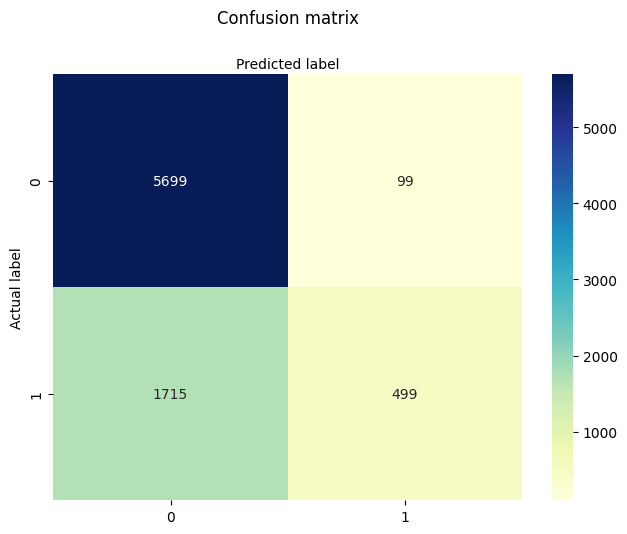

In [18]:
get_results(Y1_test, Y_pred1)
get_confusion_matrix(cnf_matrix1)

City hotel

Accuracy: 0.7803479137778898
Precision: 0.8619646182495344
Recall: 0.5614859742228961
F1-Score: 0.6800110182719677


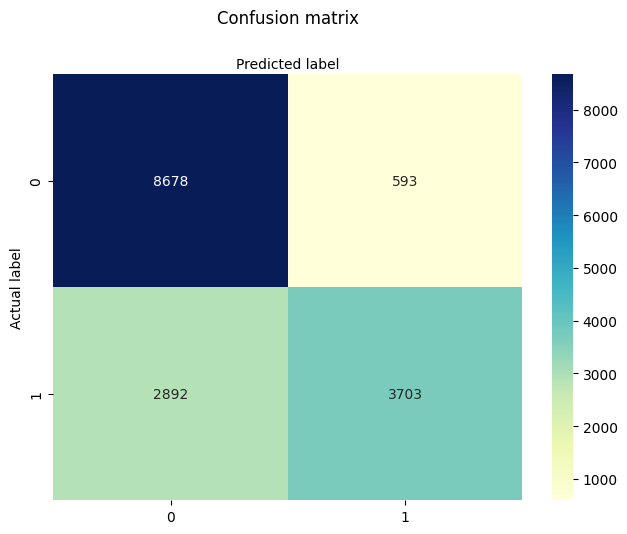

In [19]:
get_results(Y2_test, Y_pred2)
get_confusion_matrix(cnf_matrix2)

Logistic Regression with PCA

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = part1.iloc[:, 1:].values
Y = part1.iloc[:, 0].values

X2 = part2.iloc[:, 1:].values
Y2 = part2.iloc[:, 0].values

x = StandardScaler().fit_transform(X)

n = 12
pca = PCA(n_components=n)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
finalDf = pd.concat([principalDf, part1.iloc[:, 0]], axis = 1)
display(finalDf.head())


x2 = StandardScaler().fit_transform(X2)

n = 12
pca2 = PCA(n_components=n)
principalComponents2 = pca.fit_transform(x2)
principalDf2 = pd.DataFrame(data = principalComponents2)
finalDf2 = pd.concat([principalDf2, part2.iloc[:, 0]], axis = 1)
display(finalDf2.head())

,0,1,2,3,4,5,6,7,8,9,10,11,is_canceled
0,-0.412708,-0.687328,0.644878,2.218637,-1.665727,-1.913199,0.424509,1.638902,2.193176,-0.368898,1.577120,0.408389,0
1,1.040692,0.465229,1.324787,3.192950,-1.869716,-1.758382,1.152762,1.684162,3.625197,-0.677588,2.164770,-0.284871,0
2,-1.515600,-2.012073,-0.143844,0.021995,-0.805489,-1.783248,0.248015,1.609153,-1.075316,-0.340994,0.317414,-0.453777,0
3,-0.506677,-2.071474,-0.307853,-0.612378,-0.674664,-1.110044,-0.089285,1.542366,-0.981213,-0.479108,0.323018,0.146157,0
4,-0.052879,-1.020309,-0.592673,-1.461302,-0.612628,0.217981,-0.443974,1.559758,-0.175659,0.337930,0.614911,0.429911,0


,0,1,2,3,4,5,6,7,8,9,10,11,is_canceled
0,-1.402569,-1.701181,-0.641261,-0.638899,-0.354074,-0.114483,0.511408,-1.803230,0.614334,-0.137377,1.217567,-0.322864,0
1,-0.023558,-0.162195,-0.830073,-0.750710,0.719818,-0.784797,1.025183,-0.616906,1.145664,0.437184,0.609388,-1.254193,1
2,-0.326138,-1.034311,-1.058820,-0.578392,0.469960,-0.305881,0.925271,-1.038727,0.884859,0.381552,1.822863,-0.964564,1
3,0.496617,0.144453,-1.804634,-0.492516,2.068518,-1.058460,0.814252,-0.551537,0.963496,0.017897,0.147627,0.095906,1
4,-0.171699,-0.383777,-0.461256,-0.899622,0.042997,-1.191573,0.832668,-0.531569,1.024880,0.545901,0.149708,-0.430053,1


In [21]:
X = finalDf.iloc[:, 0:n].values
Y = finalDf.iloc[:, n].values

X2 = finalDf2.iloc[:, 0:n].values
Y2 = finalDf2.iloc[:, n].values

#split our Data set into Training Data and Test Data. Training data will be used to train
#Logistic model and Test data will be used to validate our model. klearn to split our data. import  train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 0)

#feature scaling to scale our data between 0 and 1 to get better accuracy
#Here Scaling is important because there is a huge difference between Age and EstimatedSalary.

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X2_train = sc_X.fit_transform(X2_train)
X2_test = sc_X.transform(X2_test)

#Import LogisticRegression from sklearn.linear_model
#Make an instance classifier of the object LogisticRegression and give random_state =  0
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

classifier2 = LogisticRegression(random_state=0)
classifier2.fit(X2_train, Y2_train)

LogisticRegression(random_state=0)

Resort Hotel
Accuracy: 0.7654767848227658
Precision: 0.7694974003466204
Recall: 0.20273972602739726
F1 score: 0.32092518973617634


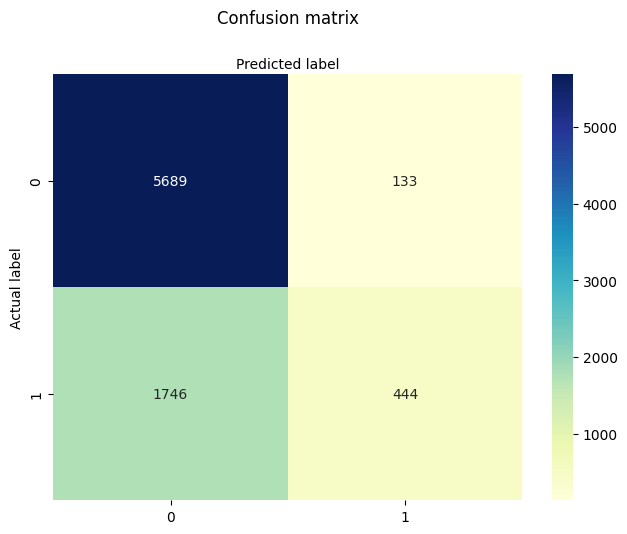

In [22]:
Y_pred = classifier.predict(X_test)

#Confusion matrix

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
#print(cnf_matrix)

#accuracy, precision, recall
from sklearn import metrics
print('Resort Hotel')
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("F1 score:", metrics.f1_score(Y_test, Y_pred))

get_confusion_matrix(cnf_matrix)

City Hotel
Accuracy: 0.7550737425942267
Precision: 0.7848936170212766
Recall: 0.562004875076173
F1 score: 0.6550071022727273


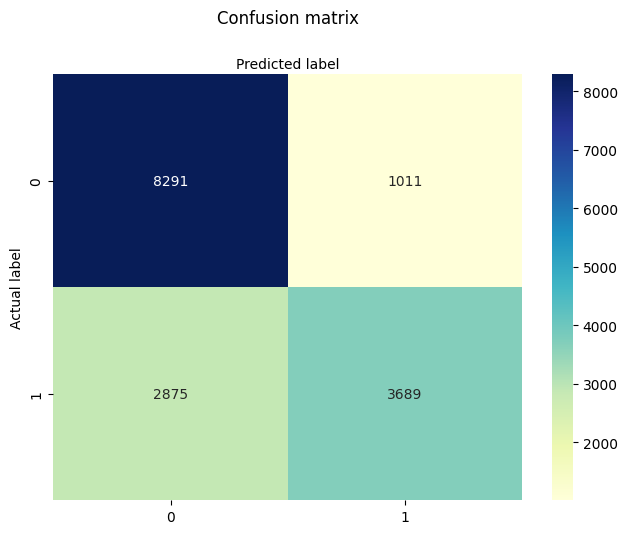

In [23]:
Y2_pred = classifier2.predict(X2_test)

#Confusion matrix

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y2_test, Y2_pred)
#print(cnf_matrix)

#accuracy, precision, recall
from sklearn import metrics
print('City Hotel')
print("Accuracy:",metrics.accuracy_score(Y2_test, Y2_pred))
print("Precision:",metrics.precision_score(Y2_test, Y2_pred))
print("Recall:",metrics.recall_score(Y2_test, Y2_pred))
print("F1 score:", metrics.f1_score(Y2_test, Y2_pred))

get_confusion_matrix(cnf_matrix)

In [ ]:
# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from tqdm import tqdm  # Import tqdm

# Convert NumPy arrays to PyTorch tensors
X1_train, X1_test, Y1_train, Y1_test = map(torch.tensor, (X1_train, X1_test, Y1_train, Y1_test))
X2_train, X2_test, Y2_train, Y2_test = map(torch.tensor, (X2_train, X2_test, Y2_train, Y2_test))
#X1_train, X1_test, Y1_train, Y1_test = X1_train.to(torch.device("cuda:0")), X1_test.to(torch.device("cuda:0")), Y1_train.to(torch.device("cuda:0")), Y1_test.to(torch.device("cuda:0"))
#X2_train, X2_test, Y2_train, Y2_test = X2_train.to(torch.device("cuda:0")), X2_test.to(torch.device("cuda:0")), Y2_train.to(torch.device("cuda:0")), Y2_test.to(torch.device("cuda:0"))

# Model
class FullyConnectedClassifier(nn.Module):
    def __init__(self, input_size):
        super(FullyConnectedClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(128, 64)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

# Instantiate the model
model1 = FullyConnectedClassifier(input_size=X1_train.shape[1])#.to(torch.device("cuda:0"))
model2 = FullyConnectedClassifier(input_size=X2_train.shape[1])#.to(torch.device("cuda:0"))

# Loss function and optimizer
criterion = nn.BCELoss()
optimizer1 = optim.Adam(model1.parameters(), lr=0.001)
optimizer2 = optim.Adam(model2.parameters(), lr=0.001)

# Training loop with tqdm
def train_model_with_progress(model, optimizer, X_train, Y_train):
    # Use tqdm to create a progress bar
    for epoch in tqdm(range(epochs), desc="Training", unit="epoch"):
        # Forward pass
        outputs = model(X_train.float())
        loss = criterion(outputs, Y_train.float().view(-1, 1))

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Train models with tqdm
epochs = 1000
train_model_with_progress(model1, optimizer1, X1_train, Y1_train)
train_model_with_progress(model2, optimizer2, X2_train, Y2_train)

# Evaluate the models on the test sets
with torch.no_grad():
    model1.eval()
    predictions1 = (model1(X1_test.float()) > 0.5).float()

    model2.eval()
    predictions2 = (model2(X2_test.float()) > 0.5).float()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Convert the PyTorch tensors back to NumPy arrays
predictions1 = predictions1.numpy()
predictions2 = predictions2.numpy()

# Evaluate model1
accuracy1 = accuracy_score(Y1_test, predictions1)
precision1 = precision_score(Y1_test, predictions1)
recall1 = recall_score(Y1_test, predictions1)
f1_score1 = f1_score(Y1_test, predictions1)
conf_matrix1 = confusion_matrix(Y1_test, predictions1)

# Evaluate model2
accuracy2 = accuracy_score(Y2_test, predictions2)
precision2 = precision_score(Y2_test, predictions2)
recall2 = recall_score(Y2_test, predictions2)
f1_score2 = f1_score(Y2_test, predictions2)
conf_matrix2 = confusion_matrix(Y2_test, predictions2)

Results for Model 1:
Accuracy: 0.8135297054418372
Precision: 0.6630434782608695
Recall: 0.6612466124661247
F1 Score: 0.6621438263229308


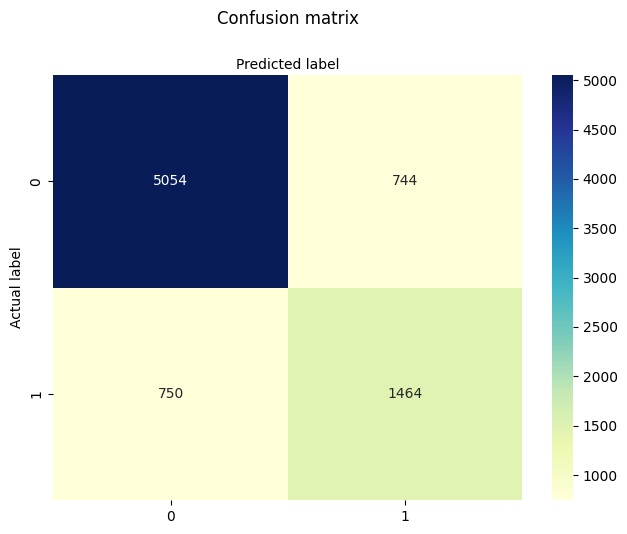

In [ ]:
get_confusion_matrix(conf_matrix1)
# Print results
print("Results for Model 1:")
print(f"Accuracy: {accuracy1}")
print(f"Precision: {precision1}")
print(f"Recall: {recall1}")
print(f"F1 Score: {f1_score1}")

Results for Model 2:
Accuracy: 0.8241522753056851
Precision: 0.8012668250197942
Recall: 0.7672479150871873
F1 Score: 0.7838884585592565


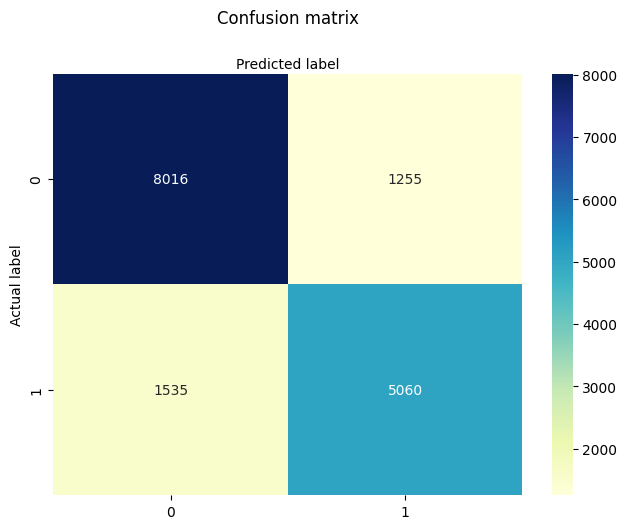

In [ ]:
get_confusion_matrix(conf_matrix2)
print("Results for Model 2:")
print(f"Accuracy: {accuracy2}")
print(f"Precision: {precision2}")
print(f"Recall: {recall2}")
print(f"F1 Score: {f1_score2}")

Plan B

In [25]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

#swap points and rebounds columns
df = swap_columns(df, 'hotel', 'is_canceled')

def hotel(x):
    return x.map({'Resort Hotel':1, 'City Hotel':2})

var = ['hotel']
df[var] = df[var].apply(hotel)

display(df.head())

,is_canceled,hotel,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,market_segment,distribution_channel,is_repeated_guest,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,total_of_special_requests
0,0,1,342,7,1,0,0,2,1,1,0,0,3,3,3,1,0,1,0.0,0
1,0,1,737,7,1,0,0,2,1,1,0,0,3,3,4,1,0,1,0.0,0
2,0,1,7,7,1,0,1,1,1,1,0,0,1,3,0,1,0,1,75.0,0
3,0,1,13,7,1,0,1,1,2,2,0,0,1,1,0,1,0,1,75.0,0
4,0,1,14,7,1,0,2,2,3,3,0,0,1,1,0,1,0,1,98.0,1


In [26]:
X = df.iloc[:, 1:].values
Y = df.iloc[:, 0].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

from sklearn.preprocessing import StandardScaler

# Scale for both resort and city hotels
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

cnf_matrix, Y_pred = logistic_regression(X_train, Y_train, X_test, Y_test)

Both

Accuracy: 0.7733897311332607
Precision: 0.8578608765581022
Recall: 0.4756437409430387
F1-Score: 0.6119756185012549


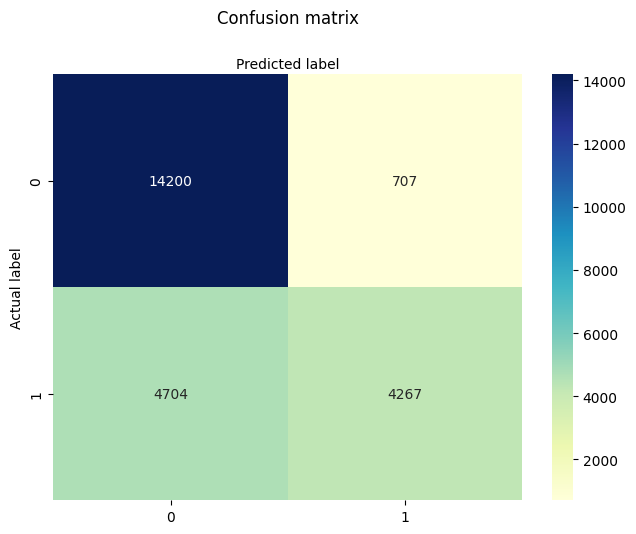

In [27]:
get_results(Y_test, Y_pred)
get_confusion_matrix(cnf_matrix)

In [30]:
# PyTorch (UPDATED)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from tqdm import tqdm  # Import tqdm

# Convert NumPy arrays to PyTorch tensors
X1_train, X1_test, Y1_train, Y1_test = map(torch.tensor, (X_train, X_test, Y_train, Y_test))

# Model
class FullyConnectedClassifier(nn.Module):
    def __init__(self, input_size):
        super(FullyConnectedClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(128, 64)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

# Instantiate the model
model1 = FullyConnectedClassifier(input_size=X1_train.shape[1])

# Loss function and optimizer
criterion = nn.BCELoss()
optimizer1 = optim.Adam(model1.parameters(), lr=0.001)

# Training loop with tqdm
def train_combined_model_with_progress(model, optimizer, X_train, Y_train):
    for epoch in tqdm(range(epochs), desc="Training", unit="epoch"):
        # Forward pass
        outputs = model(X_train.float())
        loss = criterion(outputs, Y_train.float().view(-1, 1))

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Train the combined model with tqdm
epochs = 1000
train_combined_model_with_progress(model1, optimizer1, X1_train, Y1_train)

# Evaluate the combined model on the test set
with torch.no_grad():
    model1.eval()
    predictions1 = (model1(X1_test.float()) > 0.5).float()


Training: 100%|██████████| 1000/1000 [18:36<00:00,  1.12s/epoch]


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Convert the PyTorch tensors back to NumPy arrays
predictions_combined = predictions1.numpy()

# Evaluate model1
accuracy1 = accuracy_score(Y1_test, predictions1)
precision1 = precision_score(Y1_test, predictions1)
recall1 = recall_score(Y1_test, predictions1)
f1_score1 = f1_score(Y1_test, predictions1)
conf_matrix1 = confusion_matrix(Y1_test, predictions1)

Results for Model 1:
Accuracy: 0.8229332439902839
Precision: 0.7765597667638484
Recall: 0.7422806821981942
F1 Score: 0.7590333979254531


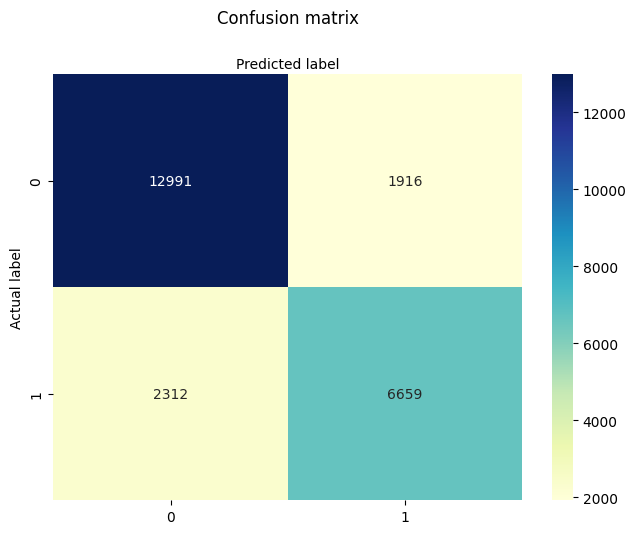

In [32]:
get_confusion_matrix(conf_matrix1)
# Print results
print("Results for Model 1:")
print(f"Accuracy: {accuracy1}")
print(f"Precision: {precision1}")
print(f"Recall: {recall1}")
print(f"F1 Score: {f1_score1}")